<a href="https://colab.research.google.com/github/dwightchurchill/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

In [0]:
# import libs
import pandas as pd
import seaborn as sns

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
# Load data 
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None)

In [88]:
# Take a look at the top 
df.head(20)
# Take a look at the bottom 
df.tail(20)

,0,1,2,3
286,70,58,4,2
287,70,66,14,1
288,70,67,0,1
289,70,68,0,1
290,70,59,8,1
291,70,63,0,1
292,71,68,2,1
293,72,63,0,2
294,72,58,0,1
295,72,64,0,1


In [89]:
# Take a look at overall numbers 
df.shape

(306, 4)

In [90]:
# Validate there are no missing values 
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [0]:
# df[1].unique()
# df[2].unique()

In [0]:
# Add informative names to the features

df.rename(index=str,columns={0:'age',1:'op_year',2:'axe_nodes_detected',3:'survival_status'},inplace=True)

In [0]:
# Set surival_status for user's who did not survive to 0 

df.loc[df['survival_status'] == 2, 'survival_status'] = 0

In [137]:
# Print first 5 rows of dataset
df.head()

,age,op_year,axe_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [183]:
# Create age bins 
age_bins = pd.cut(df['age'],3)
axe_node_bin = pd.cut(df['axe_nodes_detected'],5)
pd.crosstab(df['op_year'],df['axe_nodes_detected'])

axe_nodes_detected,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
op_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58,16,6,3,3,2,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
59,8,1,8,2,0,0,1,1,2,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
60,11,7,1,2,2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
61,11,4,2,0,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
62,9,3,1,3,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
63,14,4,1,1,2,0,2,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,0,1,1,0,0,0,0,0,0
64,17,4,1,1,1,0,1,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65,13,2,0,2,2,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0
66,15,3,1,1,2,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [139]:
pd.crosstab(df['op_year'],df['survival_status'])

survival_status,0,1
op_year,,
58,12,24
59,9,18
60,4,24
61,3,23
62,7,16
63,8,22
64,8,23
65,13,15
66,6,22


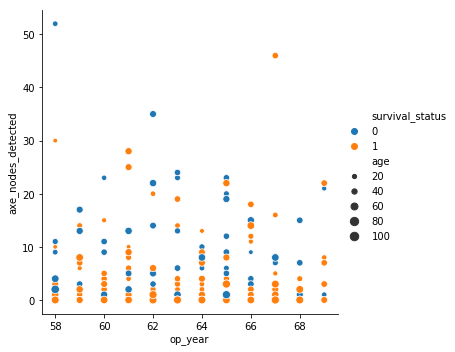

In [148]:
# Plot relationship
sns.relplot(x='op_year',y='axe_nodes_detected',hue='survival_status',size='age',data=df);

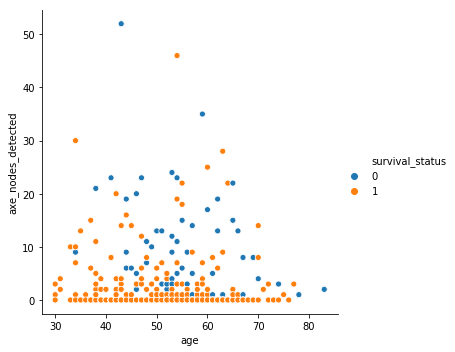

In [196]:
sns.relplot(x='age',y='axe_nodes_detected',hue='survival_status',data=df);

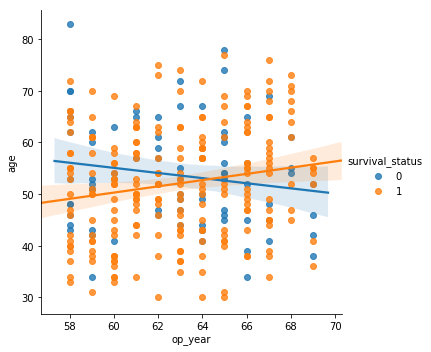

In [191]:
# sns.scatterplot(x='op_year',y='age',hue='survival_status',data=df);
sns.lmplot(x="op_year", y="age", hue='survival_status', data=df);

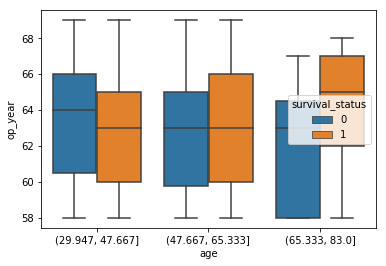

In [185]:
sns.boxplot(x=age_bins, y='op_year', hue="survival_status", data=df);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1) What is at least one feature that looks to have a positive relationship with survival?
- Age (specfically under 40) appears to have a positive relationship with survival


2) What is at least one feature that looks to have a negative relationship with survival?
- The less number of positive axillary nodes detected appears to be related to surviving 

3) How are those two features related with each other, and what might that mean?
- It appeared that the number of positive axillary nodes detected were conentrated in the 40-60 year age group. 